In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
ds = pd.read_excel("Employee data new.xlsx")
x = ds.iloc[:,0:6].values
y = ds.iloc[:,6].values

coder = LabelEncoder()
x[:,0] = coder.fit_transform(x[:,0])
x[:,1] = coder.fit_transform(x[:,1])
x[:,2] = coder.fit_transform(x[:,2])
x[:,3] = coder.fit_transform(x[:,3])
x[:,4] = coder.fit_transform(x[:,4])
x[:,5] = coder.fit_transform(x[:,5])
y = coder.fit_transform(y)

imp= Imputer(missing_values=np.nan,strategy="mean")
X=imp.fit_transform(x)
Y=y.reshape(-1,1)
Y=imp.fit_transform(Y)


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X[:,3].reshape(-1,1))
np.set_printoptions(precision=3)
X[:,3]=rescaledX.reshape(1,-1)


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [78]:
from sklearn.model_selection import train_test_split
t_size=0.30
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size= t_size)
X_train.shape


(331, 6)

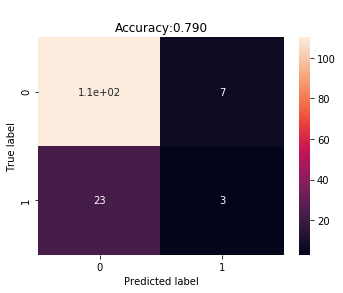

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
c1_predicted=knn.predict(X_test)
c1_predicted

cm = confusion_matrix(Y_test,c1_predicted)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm,annot=True)
plt.title('\nAccuracy:{0:.3f}'.format(accuracy_score(Y_test,c1_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [68]:
knn.score(X_test,Y_test)

0.7132867132867133

In [69]:
X

array([[ 1.   ,  5.   ,  0.   ,  0.74 , 60.   , 39.   ],
       [ 1.   ,  6.   ,  1.   ,  0.596, 42.   , 39.   ],
       [ 0.   ,  3.   ,  1.   ,  0.139, 13.   , 39.   ],
       ...,
       [ 1.   ,  5.   ,  1.   ,  0.578, 34.   ,  4.   ],
       [ 0.   ,  3.   ,  1.   ,  0.139, 18.   ,  4.   ],
       [ 0.   ,  3.   ,  1.   ,  0.381, 27.   ,  4.   ]])

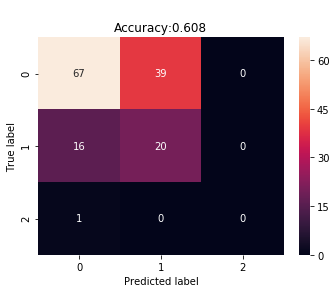

In [70]:
model = GaussianNB()
model.fit(X_train,Y_train)
c2_predicted = model.predict(X_test)
c2_predicted

cm = confusion_matrix(Y_test,c2_predicted)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm,annot=True)
plt.title('\nAccuracy:{0:.3f}'.format(accuracy_score(Y_test,c2_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [71]:
model.score(X_test,Y_test)

0.6083916083916084

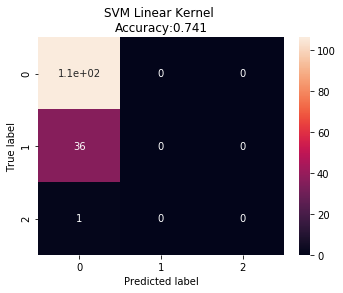

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_fscore_support

clf=SVC(kernel='linear').fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

cm=confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm,annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(Y_test,Y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()